<a id = '0.0'></a>
<p style = "font-size : 35px; color : black ; font-family : 'Comic Sans MS'; text-align : center; background-color : #008080		; border-radius: 5px 5px;"><strong>Movie Recommendation and Analysis</strong></p>  

<img src="https://forum-cdn.knime.com/uploads/default/original/3X/6/e/6e1b447ce04fc4a70dca63b693bff66e8e79939d.jpeg" jsaction="VQAsE" class="sFlh5c pT0Scc iPVvYb" style="margin-left: 20%; float: center;  border:5px solid ; width:50%; height : 60%;"/></a>

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> Problem Statement

### Perform analysis and Basic Recommendations based on Similar Genres and Movies which Users prefer.

#### Some of the Key Points on which we will be focusing include:
* Profitability of Movies
* Language based Gross Analysis
* Comparison of Gross and Profit for Different Genres,
* Recommendation systems based on Actors, Movies, Genres.

`This Project will help us to understand Correlation between these factors.`

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 1- Importing libraries 

In [88]:
# lets import the basic Libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('fivethirtyeight')

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

<a id = '0.2'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#2" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 2- Importing dataset

In [89]:
data = pd.read_csv('movie_metadata.csv')

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 3- Basic Data Exploration(Understanding the Dataset

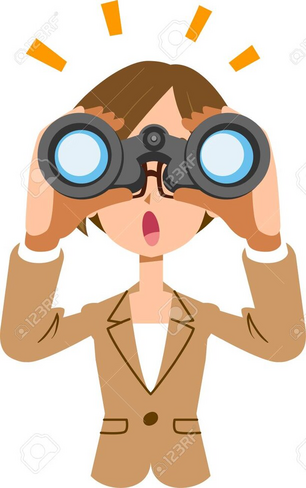

#### We will check the below things:

* Head of the dataset
* The shape of the dataset
* Datatypes for every column 
* Summary of the dataset

In [90]:
data.head().style.background_gradient(cmap="Wistia")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.000000,178.000000,0.000000,855.000000,Joel David Moore,1000.000000,760505847.000000,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.000000,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.000000,English,USA,PG-13,237000000.000000,2009.000000,936.000000,7.900000,1.780000,33000
1,Color,Gore Verbinski,302.000000,169.000000,563.000000,1000.000000,Orlando Bloom,40000.000000,309404152.000000,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.000000,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.000000,English,USA,PG-13,300000000.000000,2007.000000,5000.000000,7.100000,2.350000,0
2,Color,Sam Mendes,602.000000,148.000000,0.000000,161.000000,Rory Kinnear,11000.000000,200074175.000000,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.000000,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.000000,English,UK,PG-13,245000000.000000,2015.000000,393.000000,6.800000,2.350000,85000
3,Color,Christopher Nolan,813.000000,164.000000,22000.000000,23000.000000,Christian Bale,27000.000000,448130642.000000,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.000000,deception|imprisonment|lawlessness|police officer|terrorist plot,http://www.imdb.com/title/tt1345836/?ref_=fn_tt_tt_1,2701.000000,English,USA,PG-13,250000000.000000,2012.000000,23000.000000,8.500000,2.350000,164000
4,nan,Doug Walker,nan,nan,131.000000,nan,Rob Walker,131.000000,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,nan,0.000000,nan,http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1,nan,nan,nan,nan,nan,nan,12.000000,7.100000,nan,0


In [91]:
data.shape

(5043, 28)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [93]:
data.describe().T.style.background_gradient(cmap="Wistia")

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.000000,140.194272,121.601675,1.000000,50.000000,110.000000,195.000000,813.000000
duration,5028.000000,107.201074,25.197441,7.000000,93.000000,103.000000,118.000000,511.000000
director_facebook_likes,4939.000000,686.509212,2813.328607,0.000000,7.000000,49.000000,194.500000,23000.000000
actor_3_facebook_likes,5020.000000,645.009761,1665.041728,0.000000,133.000000,371.500000,636.000000,23000.000000
actor_1_facebook_likes,5036.000000,6560.047061,15020.759120,0.000000,614.000000,988.000000,11000.000000,640000.000000
gross,4159.000000,48468407.526809,68452990.438753,162.000000,5340987.500000,25517500.000000,62309437.500000,760505847.000000
num_voted_users,5043.000000,83668.160817,138485.256806,5.000000,8593.500000,34359.000000,96309.000000,1689764.000000
cast_total_facebook_likes,5043.000000,9699.063851,18163.799124,0.000000,1411.000000,3090.000000,13756.500000,656730.000000
facenumber_in_poster,5030.000000,1.371173,2.013576,0.000000,0.000000,1.000000,2.000000,43.000000
num_user_for_reviews,5022.000000,272.770808,377.982886,1.000000,65.000000,156.000000,326.000000,5060.000000


<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 4- Data Cleaning

### Garbage in Garbage out

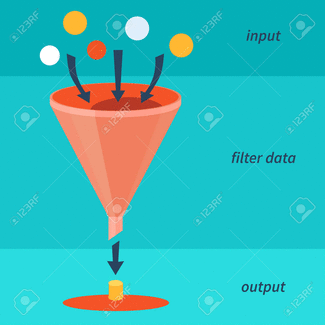

* `Drop unnecassary columns`
* `Checking for null values`
* `Drop invalid values.`

# `Drop unnecassary columns`

In [94]:
# Use the 'drop()' function to drop the unnecessary columns
data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ], 
                       axis = 1)
data.columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

# `Checking for null values`

In [95]:
Null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending = False) , 'Precentage of Null Values' : (data.isna().sum().sort_values(ascending = False)) / (data.shape[0]) * (100)} )
Null.style.background_gradient(cmap = 'Wistia')

,Null Values,Precentage of Null Values
gross,884,17.529248
budget,492,9.756098
title_year,108,2.141582
director_name,104,2.062265
num_critic_for_reviews,50,0.991473
actor_3_name,23,0.456078
num_user_for_reviews,21,0.416419
duration,15,0.297442
language,14,0.277613
actor_2_name,13,0.257783


In [96]:
# Since 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column using the
# 'isnan' function of NumPy alongwith a negation '~'

data = data [~ np.isnan(data['gross'])]
data = data [~ np.isnan(data['budget'])]

# The rows for which the sum of Null is less than two are retained

data = data[data.isnull().sum(axis=1) <= 2]

# using mean for numerical columns

data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean() , inplace = True)
data['duration'].fillna(data['duration'].mean() , inplace = True)

# using mode for categorical column

data['language'].fillna(data['language'].mode()[0] , inplace = True)

# As we know that We cannot use statistical values for imputing the missing values of actor names, so we will replace the 
# actor names with "Unknown Actor"

data['actor_2_name'].fillna('Unknown Actor' , inplace = True)
data['actor_3_name'].fillna('Unknown Actor' , inplace = True)

In [97]:
Null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending = False) , 'Precentage of Null Values' : (data.isna().sum().sort_values(ascending = False)) / (data.shape[0]) * (100)} )
Null.style.background_gradient(cmap = 'Wistia')

,Null Values,Precentage of Null Values
director_name,0,0.000000
num_critic_for_reviews,0,0.000000
duration,0,0.000000
actor_2_name,0,0.000000
gross,0,0.000000
genres,0,0.000000
actor_1_name,0,0.000000
movie_title,0,0.000000
num_voted_users,0,0.000000
actor_3_name,0,0.000000


`Delete Data Duplicated`

In [98]:
# lets print the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ",data.shape[0])

# so lets remove all the duplicates from the data
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

# lets print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3888
No. of Rows After Removing Duplicates:  3853


<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 5- Feature Engineering

In [99]:
# Lets convert the gross and budget from $ to Million $ to make our analysis easier

data['gross'] = data['gross'] / 1000000
data['budget'] = data['budget'] / 1000000

In [100]:
# lets check the values in the language column

data['language'].value_counts()

language
English       3674
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Thai             3
Hebrew           3
Persian          3
Danish           3
Dutch            3
Dari             2
Indonesian       2
Aboriginal       2
Arabic           1
Russian          1
Vietnamese       1
Dzongkha         1
Romanian         1
Zulu             1
Bosnian          1
Czech            1
Icelandic        1
Hungarian        1
Mongolian        1
Aramaic          1
Telugu           1
Kazakh           1
Maya             1
Filipino         1
Swedish          1
Name: count, dtype: int64

In [101]:
# Looking at the above output we can easily observe that out of 3,500 movies only 150 movies are of other languages
# so it is better to keep only two languages that is English and Foreign

def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'
# lets apply the function on the language column

data['language'] = data['language'].apply(language)

# lets check the values again

data['language'].value_counts()

language
English    3674
Foreign     179
Name: count, dtype: int64

In [102]:
def duration(x):
    if isinstance(x, str):
        # Handle string values (e.g., "Short" or "Long")
        if x.lower() == "short":
            return 1  # Assuming 1 represents "Short"
        elif x.lower() == "long":
            return 2  # Assuming 2 represents "Long"
        else:
            return 0  # Handle other cases (optional)
    else:
        # Handle numeric values (e.g., minutes)
        if x <= 120:
            return "Short"
        else:
            return "Long"

# lets apply this function on the duration column
data['duration'] = data['duration'].apply(duration)

# lets check the values of Duration column
data['duration'].value_counts()

duration
Short    2936
Long      917
Name: count, dtype: int64

In [103]:
data['genres'].value_counts()

genres
Drama                                     153
Comedy|Drama|Romance                      151
Comedy|Drama                              147
Comedy                                    145
Comedy|Romance                            135
                                         ... 
Action|Crime|Drama|Thriller|War             1
Adventure|Comedy|Family|Musical             1
Action|Adventure|Family|Fantasy|Sci-Fi      1
Action|Drama|Mystery|Thriller|War           1
Comedy|Crime|Horror                         1
Name: count, Length: 762, dtype: int64

In [104]:
data_spilt = data['genres'].str.split('|')

In [105]:
for i in data_spilt:
    i
    print(i)

['Action', 'Adventure', 'Fantasy', 'Sci-Fi']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure', 'Thriller']
['Action', 'Thriller']
['Action', 'Adventure', 'Sci-Fi']
['Action', 'Adventure', 'Romance']
['Adventure', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Musical', 'Romance']
['Action', 'Adventure', 'Sci-Fi']
['Adventure', 'Family', 'Fantasy', 'Mystery']
['Action', 'Adventure', 'Sci-Fi']
['Action', 'Adventure', 'Sci-Fi']
['Action', 'Adventure']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure', 'Western']
['Action', 'Adventure', 'Fantasy', 'Sci-Fi']
['Action', 'Adventure', 'Family', 'Fantasy']
['Action', 'Adventure', 'Sci-Fi']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure', 'Comedy', 'Family', 'Fantasy', 'Sci-Fi']
['Adventure', 'Fantasy']
['Action', 'Adventure', 'Fantasy']
['Action', 'Adventure', 'Drama', 'History']
['Adventure', 'Fantasy']
['Adventure', 'Family', 'Fantasy']
['Action', 'Adventure', 'Drama', 'Romance']
['Drama', 'Romance']
['Action', 'Adven

* We can see from the above output that most of the movies are having a lot of genres. also, a movie can have so many genres so lets keep four genres

In [106]:
# Genre1
data['Genre1'] = data_spilt.apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['Genre2'] = data_spilt.apply(lambda x: x[1] if len(x) > 1 else x[0])
data['Genre3'] = data_spilt.apply(lambda x: x[2] if len(x) > 2 else x[0])
data['Genre4'] = data_spilt.apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the  data
data[['genres','Genre1','Genre2','Genre3','Genre4']].head(5)

,genres,Genre1,Genre2,Genre3,Genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


In [107]:
# lets create a Profit column using the Budget and Gross

data['Profit'] = data['gross'] - data['budget']

<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 6- Exploratory Data Analysis (EDA)

## `First group the genres and get max, min, and avg gross of the movies of that genre.`

In [108]:
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# `Top 10 Most Popular Movies on Social Media`

* To calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.

In [109]:
data['Social_Media_Popularity'] = (data['num_user_for_reviews']/
                                   data['num_voted_users'])*data['movie_facebook_likes'] 

# `Top 10 Most Popular Movies on Social Media`

In [110]:
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
        ascending = False).head(10).reset_index().style.background_gradient(cmap = 'Wistia')
display(x)

,index,movie_title,Social_Media_Popularity
0,10,Batman v Superman: Dawn of Justice,1599.794424
1,150,Ghostbusters,1076.336425
2,1582,Ghostbusters,1075.827482
3,96,Interstellar,1024.560802
4,3015,10 Days in a Madhouse,828.025478
5,945,Into the Woods,692.937200
6,73,Suicide Squad,652.816996
7,1190,Fifty Shades of Grey,624.306881
8,108,Warcraft,622.790277
9,92,Independence Day: Resurgence,599.274128


# `Top 10 Most Popular Movies on Social Media`

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


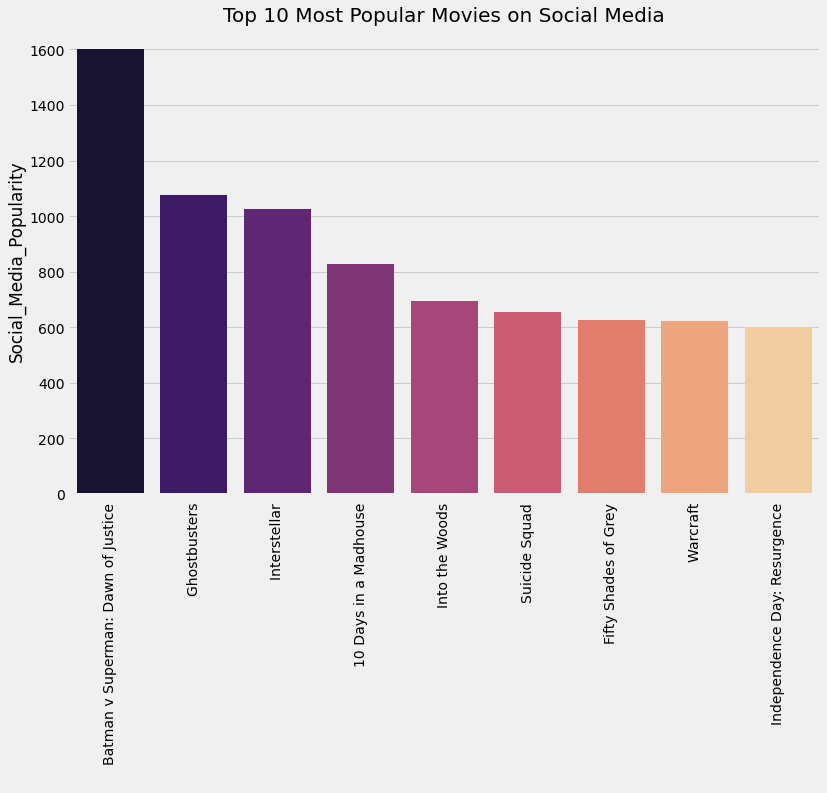

In [111]:
# lets also check the Top 10 Most Popular Movies on Social Media
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',
                                                                ascending = False).head(10).reset_index()
print(x)
sns.barplot(data = x , x = x['movie_title'], y = x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

In [112]:
data['title_year'] = data['title_year'].astype('int')

In [113]:
display(data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).style.background_gradient(cmap = 'Wistia'))

# `The Most Profitable Movie from each Genre`

In [114]:
print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['Genre1'])['Profit'].idxmax()][['Genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'Wistia'))

The Most Profitable Movie from each Genre


,Genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


# `Which Genre is Most Bankable?`

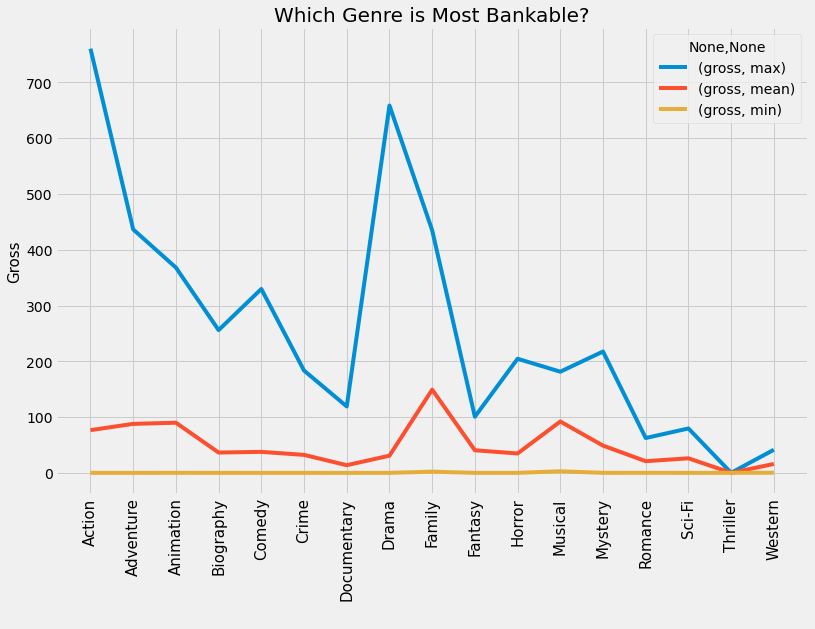

In [115]:
data[['Genre1','gross',]].groupby(['Genre1']).agg(['max','mean','min']).plot(kind = 'line')
plt.title('Which Genre is Most Bankable?', fontsize = 20)
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
     'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('Gross', fontsize = 15)
plt.xlabel(' ',)
plt.show()

# `Most Profitable Years in Box Office`

In [116]:
display(data[['title_year','language','Profit']].groupby(['language',
               'title_year']).agg('sum').sort_values(by = 'Profit',
                ascending = False).head(10).style.background_gradient(cmap = 'Wistia'))

# `Time Series for Box Office Profit for English vs Foreign Movies`

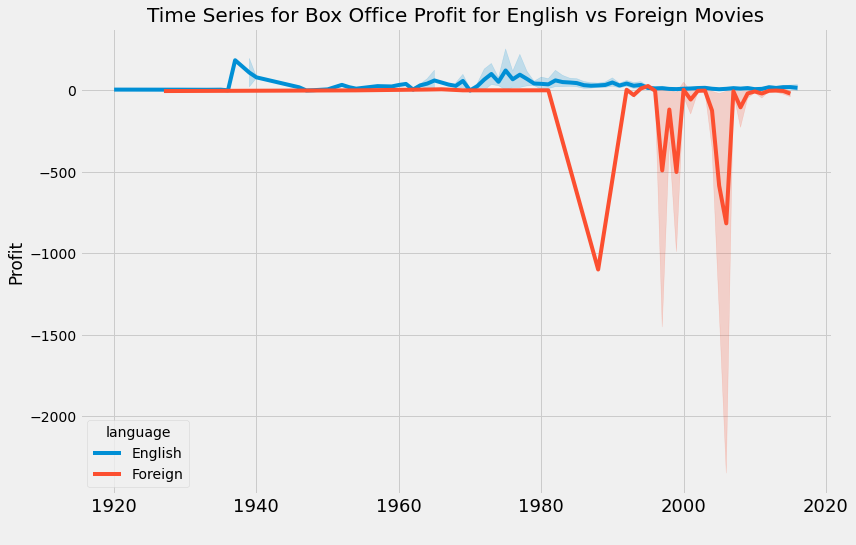

In [117]:
# lets plot them
sns.lineplot(data = data , x= data['title_year'], y = data['Profit'], hue = data['language'])
plt.title('Time Series for Box Office Profit for English vs Foreign Movies', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()

# `Movies that Made Huge Losses`

In [118]:
display(data[data['Profit'] < -2000][['movie_title' , 'language' , 'Profit']].style.background_gradient(cmap = 'Wistia'))

,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


# `Gross Comparison`

Text(0.5, 1.0, 'Gross Comparison')

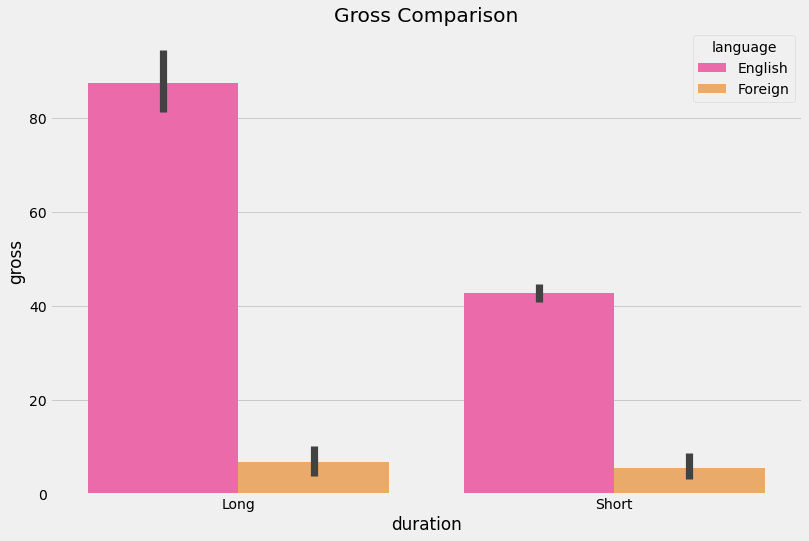

In [119]:
sns.barplot(data = data , x = data['duration'], y = data['gross'], hue = data['language'], palette = 'spring')
plt.title('Gross Comparison')

# `Which Duration Movie has a IMDB Score?`

In [120]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(data[data['duration'] == 'Short']['imdb_score'].mean()))

print("\nHighest Rated Long Duration Movie\n", 
    data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))
print("\nHighest Rated Short Duration Movie\n", 
    data[data['duration'] == 'Short'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

Average IMDB Score for Long Duration Movies is 7.06
Average IMDB Score for Short Duration Movies is 6.28

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
               movie_title  imdb_score
3592  The Usual Suspects          8.6


# `IMDB Ratings vs Gross`

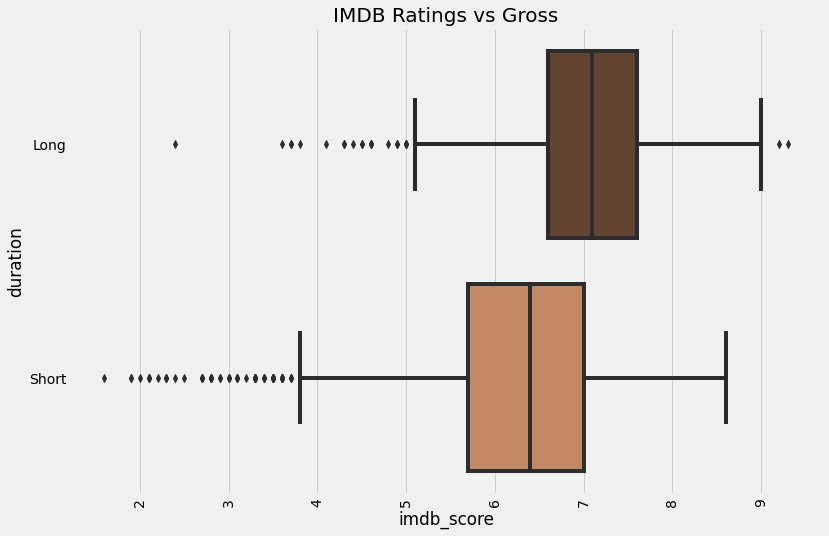

In [121]:
sns.boxplot(data = data , x = data['imdb_score'], y = data['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# `Making query for Actor`

In [122]:
def query_actors(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a._append(b)
    y = x._append(c)
    
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',
        ]]
    return y.style.background_gradient(cmap = 'Wistia')

In [123]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.000000,112.703470,2009,Comedy|Drama|Romance,English,6.600000
1106,The River Wild,45.000000,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.300000
1204,Julie & Julia,40.000000,94.125426,2009,Biography|Drama|Romance,English,7.000000
1408,The Devil Wears Prada,35.000000,124.732962,2006,Comedy|Drama|Romance,English,6.800000
1483,Lions for Lambs,35.000000,14.998070,2007,Drama|Thriller|War,English,6.200000
1575,Out of Africa,31.000000,87.100000,1985,Biography|Drama|Romance,English,7.200000
1618,Hope Springs,30.000000,63.536011,2012,Comedy|Drama|Romance,English,6.300000
1674,One True Thing,30.000000,23.209440,1998,Drama,English,7.000000
1925,The Hours,25.000000,41.597830,2002,Drama|Romance,English,7.600000
2781,The Iron Lady,13.000000,29.959436,2011,Biography|Drama|History,English,6.400000


# `Making Reports for Actor`

#### It would be very Interesting if we can create a Function which can provide a summary of an Actor which should Include:
* The Time Period of Actor
* Maximum Gross Amount
* Minimum Gross Amount
* Average IMDB Ratings for the Movie
* Most Common Genres

In [124]:
def actors_report(x):
    a = data[data['actor_1_name'] == x]
    b = data[data['actor_2_name'] == x]
    c = data[data['actor_3_name'] == x]
    x = a._append(b)
    y = x._append(c)
    print("Time:",y['title_year'].min(), y['title_year'].max())
    print("Max Gross : {0:.2f} Millions".format(y['gross'].max()))
    print("Avg Gross : {0:.2f} Millions".format(y['gross'].mean()))
    print("Min Gross : {0:.2f} Millions".format(y['gross'].min()))
    print("Number of 100 Million Movies :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most Common Genres:\n",y['Genre1'].value_counts().head())

In [125]:
actors_report('Meryl Streep')

Time: 1985 2014
Max Gross : 143.70 Millions
Avg Gross : 55.23 Millions
Min Gross : 9.66 Millions
Number of 100 Million Movies : 4
Avg IMDB Score : 6.81
Most Common Genres:
 Genre1
Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: count, dtype: int64


<a id = '0.1'></a>
<p class="list-group-item list-group-item-action" id = '0.1' data-toggle="list" href="#1" role="tab" aria-controls="profile" style="background-color:yellow;font-size : 30px;color:black"> 7- Recommendation

# `Recommending Movies based on Languages`

In [126]:
def recommend_lang(language):
    y = data[['language','movie_title','imdb_score']][data['language'] == language]
    y = y.sort_values(by = 'imdb_score' , ascending = False)
    return y.head(15).style.background_gradient(cmap = 'Wistia')

In [127]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.900000
4029,Foreign,City of God,8.700000
4747,Foreign,Seven Samurai,8.700000
2373,Foreign,Spirited Away,8.600000
4921,Foreign,Children of Heaven,8.500000
4259,Foreign,The Lives of Others,8.500000
4659,Foreign,A Separation,8.400000
1329,Foreign,Baahubali: The Beginning,8.400000
1298,Foreign,Amélie,8.400000
2323,Foreign,Princess Mononoke,8.400000


# `Recommending Movies Based on Actors`

In [128]:
def recommend_movies_on_actors(actor_name):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == actor_name]
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == actor_name]
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == actor_name]
    x = a._append(b)
    y = x._append(c)
    y = y.sort_values(by = 'imdb_score' , ascending = False)
    return y.head(15).style.background_gradient(cmap = 'Wistia')

In [129]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
1868,Rain Man,8.000000
75,Edge of Tomorrow,7.900000
284,Minority Report,7.700000
158,The Last Samurai,7.700000
736,Collateral,7.600000
1524,A Few Good Men,7.600000
940,Interview with the Vampire: The Vampire Chronicles,7.600000
155,Mission: Impossible - Ghost Protocol,7.400000
135,Mission: Impossible - Rogue Nation,7.400000
671,Eyes Wide Shut,7.300000


# `Recommending similar Genres`

In [130]:
from mlxtend.preprocessing import TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

# lets check the head of x
x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [131]:
# lets convert this data into boolean so that we can perform calculations
genres = x.astype('int')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [132]:
# now, lets insert the movie titles in the first column, so that we can better understand the data
genres.insert(0, 'movie_title', data['movie_title'])

genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [133]:
# lets set these movie titles as index of the data
genres = genres.set_index('movie_title')

genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [134]:
# making a recommendation engine for getting similar genres

def recommendation_genres(gen):
    gen = genres[gen]
    similar_genres = genres.corrwith(gen)
    similar_genres = similar_genres.sort_values(ascending=False)
    similar_genres = similar_genres.iloc[1:]
    return similar_genres.head(3)

In [135]:
recommendation_genres('Action')

Adventure    0.320532
Thriller     0.303708
Sci-Fi       0.295018
dtype: float64

# `Recommending similar Movies`

In [136]:
# lets make a sparse matrix to recommend the movies

x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [137]:
# making a recommendation engine for getting similar movies

def recommendation_movie(movie):    
    movie = x[movie+'\xa0']  # The +'\xa0' part is used to handle any potential whitespace or formatting issues in the movie name.
    similar_movies = x.corrwith(movie)
    similar_movies = similar_movies.sort_values(ascending=False)
    similar_movies = similar_movies.iloc[1:]
    return similar_movies.head(20)

In [138]:
# lets test on some results
recommendation_movie('The Expendables')

movie_title
Bad Boys                             1.0
You, Me and Dupree                   1.0
The Apparition                       1.0
Blast from the Past                  1.0
The Constant Gardener                1.0
NaN                                  1.0
Something Borrowed                   1.0
How to Deal                          1.0
Earth to Echo                        1.0
The Best of Me                       1.0
Predator                             1.0
Scooby-Doo 2: Monsters Unleashed     1.0
Doogal                               1.0
The Wedding Date                     1.0
Cloverfield                          1.0
Bottle Rocket                        1.0
Henry V                              1.0
21 & Over                            1.0
Resurrecting the Champ               1.0
Conan the Barbarian                  1.0
dtype: float64